# Functions

## Seperated Functions

### Change in mass

#### Equation
- $\alpha$ = age of maturity
- $m_\alpha$ = size at maturity
- $a$ = growth rate
- $b$ = maintenace cost per cell
- $c$ = reproduction cost per cell
<p>&nbsp;</p>

Before reproduction is factored in:
<p>&nbsp;</p> 
\begin{align}
        \frac{dm}{dt} &= am^\frac{3}{4} - bm  &m < m_\alpha \\
        \frac{dm}{dt} &= am^\frac{3}{4} - bm - cm^\rho  &m > m_\alpha \\
\end{align}

In [1]:
def rep_growth_t(t, m, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06): 
    """
    test of the intergrated equation from west et al 2001. 
    for predicting change in mass over time. default weights are in grams and times in days
    
        Arguments:
        m {float} -- mass at start of times step (g)
        m_alpha {float} -- asymtotic mass (g)
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)
        
    Returns:
        {float} -- rate of change of mass in grams^1/4 per day (g^1/4 d^-1)
    """
    
    dmdt = "NA" 
    b = a/(M**0.25)
    if t < 0:
        return "ERROR: t < 0"
    if t < alpha:
        dmdt = (a * (m**0.75)) - (b * m)
    elif t >= alpha:
        dmdt = (a * (m**0.75)) - (b * m) - (c * (m**rho))
    if dmdt < 0:
        dmdt = 0


    return dmdt

### Reproductive Output at t

#### Equation
##### Base Equation 
##### Variable Meanings
- $R_0$ = Lifetime production of offspring
- $cm$ = Reproductive allocation
- $m$ =  mass
- $\rho$ = reproductive scaling
- $h(t)$ = efficiency term representing a declining efficiency , i.e. reproductive senesence.
- $l_t$ = Probability of survival
- $L_t / L_\alpha$ = scaling factor for mature population
- $\alpha$ = feasible ages of first breeding 
- $b_t$ = effective energy allocated to reproduction
\begin{align}
    R_0 &= \int_\alpha^\infty l_t b_t dt\\
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
\end{align}

##### Derived Equation
##### Variable Meanings
- $L_\alpha$ = Mortality before maturity
- $Z$ = Adult instantaneous mortality rate (m > $m_\alpha$)
- $\kappa$ = rate parameter, controles reproductive senesence rate
- $Z(t)$ = instantaneous mortality rate at age t
\begin{align}
    R_0 &= \int_\alpha^\infty cm^\rho h_tl_tdt\\
    &= \int_\alpha^\infty cm^\rho (t)^\rho e^{-\kappa(t-\alpha)} L_\alpha e^{Z(t-\alpha)}dt\\
    &= L_\alpha \int_\alpha^\infty cm^\rho (t)^\rho e^{-\kappa(t-\alpha)} e^{Z(t-\alpha)}dt\\
        &= cL_\alpha \int_\alpha^\infty m^\rho (t)^\rho e^{-(\kappa Z)(t-\alpha)}dt\\
    &= c\int_\alpha^\infty e^{-Z(t)} dt  \int_\alpha^\infty m(t)^\rho e^{-(\kappa +Z)(t-\alpha)}dt\\
\end{align}


In [2]:
import scipy as sc
from scipy import exp
from scipy import integrate
import matplotlib.pyplot as plt



def L(t, k = 0.01):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            t {int} -- time
            k {float} -- reproduction senescence
        Returns:
            {float} -- lifetime reproductive output
    """
    return exp(-k*t)

def life_repro(t, m, c, alpha, rho):
    """
        Calculates lifetime reproductive output of an organism, 
        as described in Charnov et al. 2001.

        Arguments:
            t {int} -- time; days
            r {float} -- # not used so i removed it
            m {float} -- mass; g
            c {float} -- reproductive cost
            alpha {float} -- time of maturation; days
            rho {float} --  reproduction scaling parameter

        Returns:
            {float} -- reproductive output. 
                        NOTE: lifetime reproductive output is the integral.
    """
    Q = L(t-alpha) # ??????
    Z = 2/alpha
    
    if t < alpha:
        dRdt = 0
    if t >= alpha:
        dRdt = Q*c * m**rho
#         dRdt = c * Q * exp(-Z * (t - alpha)) * m 
    
    return dRdt

### begin testing of the functions
reps = 3000
# t = list(range(1, reps))
t = sc.arange(1, reps, 1) # stolen from luke's code for guinea piig


m0 = 0.1
a = .3 #0.017
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 1#0.17
M = 25000
alpha = 300 # same as rho
rho = .4#0.06 # 8th ish values from lukes graph i think

r0 = 0# starting hypothetical reproduction not used so seems odd to me.
# Repro = np.zeros(reps)
# m = np.zeros(reps)
Repro = [0] * reps
m = [0] * reps
m[0] = m0

inter = True # to change betweeen integration and my jank?
for i in t:
    
    if inter == False:
        m[i] = m[i-1]+(rep_growth_t(i, m[i-1], alpha, M, a, c, rho))
        Repro[i], error = integrate.quad(life_repro, 0, i, args = (m[i-1], c, alpha, rho))
    if inter == True:
        m[i], error = integrate.quad(rep_growth_t, 0, i, args=(m[i-1], alpha, M, a, c, rho))
        Repro[i], error = integrate.quad(life_repro, 0, i, args = (m[i-1], c, alpha, rho))
#         m, infodict = integrate.odeint(rep_growth_t, m0, t, args = (alpha, M, a, c, rho), full_output = True)
#         Repro, error = integrate.odeint(life_repro, m0, t, args = (c, alpha, rho), full_output=True)




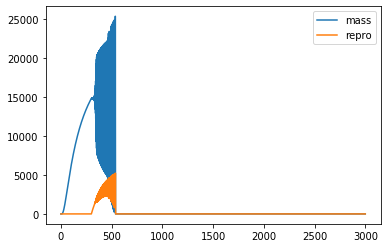

In [3]:
plt.figure()
if inter == False:
    t = sc.arange(0, reps, 1)
t = sc.arange(0, reps, 1)
plt.plot(t, m, label = "mass")
plt.plot(t, Repro, label = "repro")
plt.legend()

In [4]:
m

[0.1,
 0.05096257011486654,
 0.061924361142599804,
 0.10728979255568555,
 0.214718347182286,
 0.4475298871604009,
 0.9208296355765276,
 1.820245195931177,
 3.4136250909373786,
 6.047733030996479,
 10.126654399504993,
 16.075630545599726,
 24.299628796175185,
 35.1472582924353,
 48.8875854885927,
 65.70223621964907,
 85.69055867462404,
 108.88311589914157,
 135.2584879006527,
 164.7595116843643,
 197.3067244328688,
 232.80822859977786,
 271.16617486900407,
 312.28054819756744,
 356.0510684821155,
 402.377932538075,
 451.161950719573,
 502.3044478160748,
 555.707143205472,
 611.2721125752106,
 668.9018610443162,
 728.499497046552,
 789.9689783092886,
 853.2153972398336,
 918.1452765847736,
 984.6668529902053,
 1052.6903334062222,
 1122.1281157500207,
 1192.8949703040103,
 1264.9081819086052,
 1338.087655297313,
 1412.3559871945467,
 1487.6385093404817,
 1563.8633066696748,
 1640.961214643553,
 1718.8657993595061,
 1797.5133236230834,
 1876.842701731247,
 1956.7954453050345,
 2037.3156021

## Combined Reproductive output and change in mass function

In [5]:
from scipy import exp 
def dRmdt(mR0, t, alpha = 50, M = 1000, a = 2.15, c = 0.17, rho = 0.06, k = 0.01): 
    """
    A function to simulate change in mass and reproductive output for a time point.  
    Function designed with the intention of beign integrated.
    
        Arguments:
        t {float} -- time
        mR0 {float} -- array with mass (g) and reproduction at start of time step 
        alpha {float} -- asymtotic mass (g)
        M {float} -- asymptotic mass
        a {float} -- growth rate (UNITS?)
        b {float} -- maintenace cost per cell ## found in function
        c {float} -- reproductive cost (UNITS?)}
        rho {float} -- scaling factor of reproduction (UNITS?)
        k
        Z {float} -- ## found in function
        
    Returns:
        {dict} -- 
            dmdt --rate of change of mass in grams^1/4 per day (g^1/4 d^-1) at time t
                NOTE:  integration of dmdt will give mass at t
            Rt -- reproductive output at time t in terms of mass 
                NOTE: integration of Rt gives total Reproductive output for the bounds of the integral
    """
    # predefine outputs 
                
    m = mR0[0] 
    R = mR0[1]
    b = a/(M**0.25)
    Z = alpha/2
    Q = L(t-alpha, k)
    
    # conditional tree dependant on `alpha`
    if t < 0:
        return "ERROR: time < 0"
    if t < alpha:
        dmdt = (a * (m**0.75)) - (b * m)
        R = 0
    elif t >= alpha:
        
        dmdt = (a * (m**0.75)) - (b * m) - (c * (m**rho))
        R = Q*c * m**rho
#         R = (c * m**rho) * exp(-(k + Z) * (t - alpha))
    if m + dmdt < 0: # still not 100% sure why `-m`
        dmdt = -m
    
    return sc.array([dmdt, R])
#     return dict["dmdt" : dmdt, "Reproduciton" : R]


# Implimentation (Single values)

## Code

In [46]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 #  time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 2.15#0.017 # cost of new mass 
b =  0 # no need to calculate right now since i do it in function,could be done here to save time
c = 0.001 #0.017 # reproductive cost 
M =  15000#25000
alpha = 200 #700 # age of maturation (days)
rho = 0.01# 0.6 # reproductive scaling parameter
k =  0.01#0.01

# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments


# integration
mR = integrate.odeint(dRmdt, mR0, t, args = params)
mass = mR[:, 0]
repro = mR[:, 1]

# exploring output
repro[-50:] # final 50 values to check for `nan`




array([ 295.99706478,  295.99707575,  295.99708662,  295.99709738,
        295.99710804,  295.99711859,  295.99712904,  295.99713939,
        295.99714964,  295.99715978,  295.99716983,  295.99717978,
        295.99718963,  295.99719939,  295.99720905,  295.99721862,
        295.99722809,  295.99723747,  295.99724676,  295.99725596,
        295.99726507,  295.99727408,  295.99728301,  295.99729185,
        295.99730061,  295.99730927,  295.99731785,  295.99732635,
        295.99733476,  295.99734308,  295.99735133,  295.99735949,
        295.99736756,  295.99737556,  295.99738347,  295.99739131,
        295.99739906,  295.99740674,  295.99741433,  295.99742185,
        295.99742928,  295.99743664,  295.99744392,  295.99745114,
        295.99745828,  295.99746535,  295.99747235,  295.99747928,
        295.99748614,  295.99749293])

## Plots

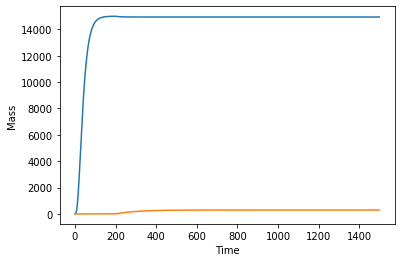

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, mass)
plt.plot(t, repro)
plt.xlabel("Time")
plt.ylabel("Mass")
plt.show()

# Exploring $\rho$ Values
- looking at what values `sc.integrate.odeint` can handle
- looking at how behaviour of the model changes with just changes in $\rho$

## Code

In [8]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days)
rho = .687 # reproductive scaling parameter | placeholder for this exploration
k = 0.01

# define rho values to interate over
rhoVals = sc.linspace(0, 2, 20)

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for rho in rhoVals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(rho)] = mR[:, 0]
    repro[str(rho)] = mR[:, 1]

# exploring output
print(mass.keys())
mass["2.0"][-50:]



dict_keys(['0.0', '0.105263157895', '0.210526315789', '0.315789473684', '0.421052631579', '0.526315789474', '0.631578947368', '0.736842105263', '0.842105263158', '0.947368421053', '1.05263157895', '1.15789473684', '1.26315789474', '1.36842105263', '1.47368421053', '1.57894736842', '1.68421052632', '1.78947368421', '1.89473684211', '2.0'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


array([ 0.93690114,  0.93690113,  0.93690113,  0.93690112,  0.93690112,
        0.93690111,  0.93690111,  0.9369011 ,  0.9369011 ,  0.93690109,
        0.93690109,  0.93690108,  0.93690108,  0.93690107,  0.93690107,
        0.93690106,  0.93690106,  0.93690106,  0.93690105,  0.93690105,
        0.93690104,  0.93690104,  0.93690104,  0.93690103,  0.93690103,
        0.93690103,  0.93690102,  0.93690102,  0.93690102,  0.93690101,
        0.93690101,  0.93690101,  0.936901  ,  0.936901  ,  0.936901  ,
        0.936901  ,  0.93690099,  0.93690099,  0.93690099,  0.93690098,
        0.93690098,  0.93690098,  0.93690098,  0.93690097,  0.93690097,
        0.93690097,  0.93690097,  0.93690097,  0.93690096,  0.93690096])

## Notes
- produces `nan` from 1.4 - 1.9 (range 0 - 2)
    - works again at $\rho = 2$

## Plots

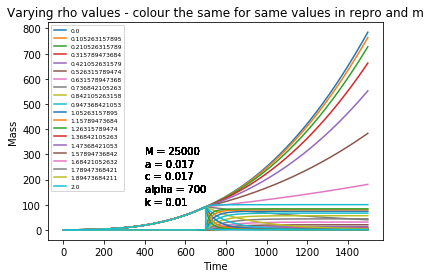

In [9]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
c_annotation  = "c = " + str(c)
alpha_annotation  = "alpha = " + str(alpha)
k_annotation  = "k = " + str(k)
for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 6})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying rho values - colour the same for same values in repro and m")
    # extra details for graph
    plt.text(400, 300, M_annotation) 
    plt.text(400, 250, a_annotation) 
    plt.text(400, 200, c_annotation) 
    plt.text(400, 150, alpha_annotation) 
    plt.text(400, 100, k_annotation)
# save image
plt.savefig("../results/rho_exploration.png", dpi = 200)


## Notes:
- `nan` values start to appear around $\rho = 0.7$ and on in both mass and reproduction

# Exploring $\alpha$ Values

## Code

In [10]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days) | placeholder for this exploration
rho = .687 # reproductive scaling parameter 
k = 0.01

# define rho values to interate over
alphaVals = sc.linspace(0, 1000, 20) # values every 50

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for alpha in alphaVals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(alpha)] = mR[:, 0]
    repro[str(alpha)] = mR[:, 1]

# exploring output
mass["789.473684211"][600:800]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


array([  58.6345325 ,   58.91593535,   59.19825427,   59.48149069,
         59.76564604,   60.05072173,   60.33671919,   60.62363984,
         60.9114851 ,   61.20025638,   61.48995511,   61.78058269,
         62.07214055,   62.36463009,   62.65805273,   62.95240988,
         63.24770294,   63.54393333,   63.84110245,   64.13921171,
         64.43826251,   64.73825625,   65.03919434,   65.34107817,
         65.64390914,   65.94768866,   66.25241812,   66.55809891,
         66.86473243,   67.17232006,   67.48086321,   67.79036326,
         68.1008216 ,   68.41223962,   68.7246187 ,   69.03796023,
         69.35226558,   69.66753616,   69.98377332,   70.30097846,
         70.61915295,   70.93829817,   71.2584155 ,   71.5795063 ,
         71.90157195,   72.22461382,   72.54863328,   72.87363171,
         73.19961046,   73.5265709 ,   73.85451441,   74.18344233,
         74.51335604,   74.8442569 ,   75.17614625,   75.50902547,
         75.8428959 ,   76.17775891,   76.51361584,   76.85046

## Plots

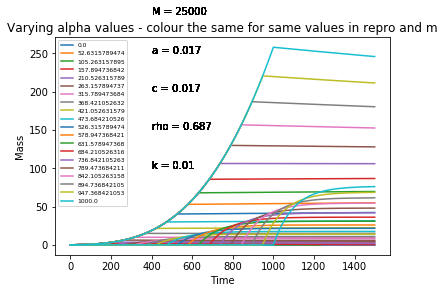

In [11]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
c_annotation  = "c = " + str(c)
rho_annotation  = "rho = " + str(rho)
k_annotation  = "k = " + str(k)

for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 6})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying alpha values - colour the same for same values in repro and m")
    # extra details for graph
    plt.text(400, 300, M_annotation) 
    plt.text(400, 250, a_annotation) 
    plt.text(400, 200, c_annotation) 
    plt.text(400, 150, rho_annotation) 
    plt.text(400, 100, k_annotation)
# save image
plt.savefig("../results/alpha_exploration.png", dpi = 200)

## Notes
- `nan` not produced - range(0 -1000)

# Exploring $c$ Values

## Code

In [12]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days) | placeholder for this exploration
rho = .687 # reproductive scaling parameter 
k = 0.01

# define rho values to interate over
c_Vals = sc.linspace(0, 0.4, 40) 

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for c in c_Vals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(c)] = mR[:, 0]
    repro[str(c)] = mR[:, 1]

# exploring output
print(mass.keys())
mass["0.297435897436"][600:800]

dict_keys(['0.0', '0.0102564102564', '0.0205128205128', '0.0307692307692', '0.0410256410256', '0.0512820512821', '0.0615384615385', '0.0717948717949', '0.0820512820513', '0.0923076923077', '0.102564102564', '0.112820512821', '0.123076923077', '0.133333333333', '0.14358974359', '0.153846153846', '0.164102564103', '0.174358974359', '0.184615384615', '0.194871794872', '0.205128205128', '0.215384615385', '0.225641025641', '0.235897435897', '0.246153846154', '0.25641025641', '0.266666666667', '0.276923076923', '0.287179487179', '0.297435897436', '0.307692307692', '0.317948717949', '0.328205128205', '0.338461538462', '0.348717948718', '0.358974358974', '0.369230769231', '0.379487179487', '0.389743589744', '0.4'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


array([ 58.6345325 ,  58.91593535,  59.19825427,  59.48149069,
        59.76564604,  60.05072173,  60.33671919,  60.62363984,
        60.9114851 ,  61.20025638,  61.48995511,  61.78058269,
        62.07214055,  62.36463009,  62.65805273,  62.95240988,
        63.24770294,  63.54393333,  63.84110245,  64.13921171,
        64.43826251,  64.73825625,  65.03919434,  65.34107817,
        65.64390914,  65.94768866,  66.25241812,  66.55809891,
        66.86473243,  67.17232006,  67.48086321,  67.79036326,
        68.1008216 ,  68.41223962,  68.7246187 ,  69.03796023,
        69.35226558,  69.66753616,  69.98377332,  70.30097846,
        70.61915295,  70.93829817,  71.2584155 ,  71.5795063 ,
        71.90157195,  72.22461382,  72.54863328,  72.87363171,
        73.19961046,  73.5265709 ,  73.85451441,  74.18344233,
        74.51335604,  74.8442569 ,  75.17614625,  75.50902547,
        75.8428959 ,  76.17775891,  76.51361584,  76.85046805,
        77.18831688,          nan,          nan,       

## Plots

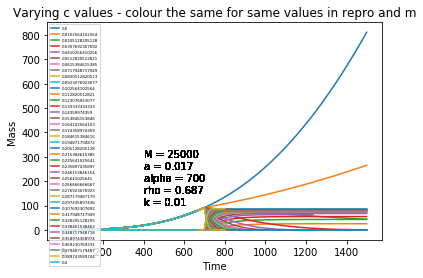

In [13]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
alpha_annotation  = "alpha = " + str(alpha)
rho_annotation  = "rho = " + str(rho)
k_annotation  = "k = " + str(k)

for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 4})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying c values - colour the same for same values in repro and m")
    # extra details for graph
    plt.text(400, 300, M_annotation) 
    plt.text(400, 250, a_annotation) 
    plt.text(400, 200, alpha_annotation) 
    plt.text(400, 150, rho_annotation) 
    plt.text(400, 100, k_annotation)
# save image
plt.savefig("../results/c_exploration.png", dpi = 200)

## Notes
- `nan` produced from 0.3 and greater - range(0 - 3)
- `nan` produced from 0.2974... and greater - range(0 - 0.4) 
- `nan` produced from 0.194 and greater - manual investigation

- tiny increases in `a` give a lot of freedom for `c` to increase without producing `nan`

# Exploring $\kappa$ Values

## Code

In [14]:
## imports
import scipy as sc
from scipy import integrate

days = 1500 # time to simulate over

# define starting parameters -- using cod values from west 2001 as a base/ballpark values

m0 = 0.1 # starting mass at t_0
R0 = 0 # starting reproduction at t_0, 0 because organism not yet mature in my sims
a = 0.017 # cost of new mass 
b = 0 ## no need to calculate right now since i do it in function,could be done here to save time
c = 0.017 # reproductive cost 
M = 25000
alpha = 700 # age of maturation (days) | placeholder for this exploration
rho = .687 # reproductive scaling parameter 
k = 0.01

# define rho values to interate over
k_Vals = sc.linspace(0, 1, 20) 

# define vars to hold the output for each rho value
mass = dict()
repro = dict()



# organising starting params for use

mR0 = sc.array([m0, R0]) # starting values for integration, [starting mass, starting repro]
t = sc.arange(0, days, 1) # t values for integration
params = (alpha, M, a, c, rho, k) # tuple for integration arguments |need to specify in loop because of changig values


# integration
for k in k_Vals:
    mR = integrate.odeint(dRmdt, mR0, t, args = (alpha, M, a, c, rho, k))
    mass[str(k)] = mR[:, 0]
    repro[str(k)] = mR[:, 1]

# exploring output
len(mass.keys())

20

## Plots

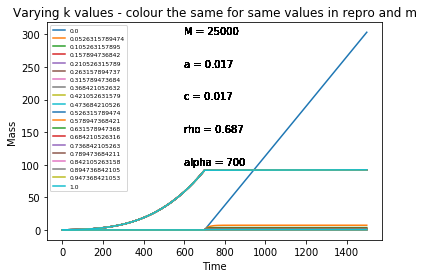

In [15]:
plt.figure()
ax = plt.gca()
# extra details to include in the graph as text
M_annotation  = "M = " + str(M)
a_annotation  = "a = " + str(a)
c_annotation  = "c = " + str(c)
rho_annotation  = "rho = " + str(rho)
alpha_annotation  = "alpha = " + str(alpha)

for i in mass.keys():
    # keep color the same for both growth curve and repro curve with same rho value
    color = next(ax._get_lines.prop_cycler)['color'] 
    plt.plot(t, mass[i], color = color, label = i)
    plt.plot(t, repro[i], color = color)
    # label for each value to be use in the legend
    plt.legend(loc = "upper left", prop={'size': 6})
    # formatting
    plt.xlabel("Time")
    plt.ylabel("Mass")
    plt.title("Varying k values - colour the same for same values in repro and m")
    # extra details for graph about the fixed values used for the simulation
    plt.text(600, 300, M_annotation) 
    plt.text(600, 250, a_annotation) 
    plt.text(600, 200, c_annotation) 
    plt.text(600, 150, rho_annotation) 
    plt.text(600, 100, alpha_annotation)
# save image
plt.savefig("../results/kappa_exploration.png", dpi = 200)

# Notes on integrater
- seems to have no issues with time scale.
